In [1]:
# importing related librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv('data/wine.csv', index_col=0)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
index,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


<AxesSubplot:title={'center':'count'}>

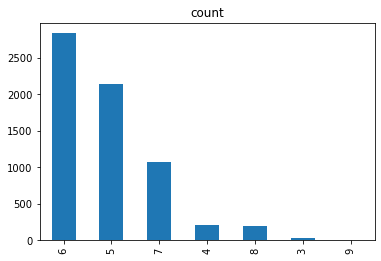

In [3]:
# plotting the labels
sample_count = df['quality'].value_counts()
sample_count.plot(kind='bar', title='count')

In [4]:
y = df[['quality']]
X = df.drop('quality', axis=1)

In [5]:
# splitting train test
n_train = int(df.shape[0] * 0.3)
X_train, X_test = X[:n_train].values, X[n_train:].values
y_train, y_test = y[:n_train].values, y[n_train:].values

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1949, 11)
(4548, 11)
(1949, 1)
(4548, 1)


In [7]:
X_train = torch.tensor(X_train.astype(np.float32)) #TO COMPLETE 
y_train = torch.tensor(y_train.astype(np.float32)) #TO COMPLETE 
X_test = torch.tensor(X_test.astype(np.float32)) #TO COMPLETE 
y_test = torch.tensor(y_test.astype(np.float32)) #TO COMPLETE 

In [8]:
nb_hidden_neurons = 10
nb_classes = len(pd.unique(df['quality']))
nb_classes

7

In [9]:
import torch.nn as nn

class Network(nn.Module):

    def __init__(self, nb_features):
        """Here we define the layers
        """

        super().__init__()
        
        self.layer_1 = nn.Linear(nb_features, nb_hidden_neurons) #TO COMPLETE
        self.layer_2 = nn.Linear(nb_hidden_neurons, nb_hidden_neurons) #TO COMPLETE
        self.layer_3 = nn.Linear(nb_hidden_neurons, nb_classes) #TO COMPLETE
        
        

    def forward(self,x):
        """Here we combine the layers
        """
        
        activation_function = nn.ReLU() #TO COMPLETE 
        last_layer_activation = nn.Softmax(dim=1)
        
        output_first_layer = activation_function(self.layer_1(x)) #TO COMPLETE 
        output_second_layer = activation_function(self.layer_2(output_first_layer)) #TO COMPLETE
        prediction = last_layer_activation(self.layer_3(output_second_layer))
        return prediction

In [10]:
my_nn = Network(nb_features=X_train.shape[1])
my_nn
#print(my_nn.parameters())

Network(
  (layer_1): Linear(in_features=11, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=7, bias=True)
)

In [11]:
import torch.optim
# Select your criterion, your learning rate and your optimizer.
criterion = nn.MSELoss() #TO COMPLETE 
learning_rate = 0.001  #TO COMPLETE 
optimizer = torch.optim.Adam(my_nn.parameters(), lr=learning_rate) #TO COMPLETE 

In [12]:
X_train.shape
X_test.shape

torch.Size([4548, 11])

In [13]:
def training(batch_size : int, nb_steps_loss_sum : int):
    """ Train the neural network, feeding it `batch_size` at a time
    and saving statistics every `nb_steps_loss_sum` steps.
    
    Arguments:
    
    - batch_size [int] : the number of input samples at each training step (called a batch)
    - nb_steps_loss_sum [int] : the number of batches before saving the loss for plotting
    
    Returns:
    - loss_list : [List[double]] : value of the loss every `nb_steps_loss_sum` steps
    """

    loss_list = []
    running_loss = 0
    batch_nb = 0

    for epoch in range(0,10): # Number of times to iterate through the complete dataset
        for idx in range(0, X_train.shape[0], batch_size):
            
            # Get input and output
            input_batch = X_train[idx:idx + batch_size]
            target = y_train[idx:idx + batch_size]
            
            # TO COMPLETE:
            # - zero gradient buffers
            optimizer.zero_grad()
            # - compute the forward pass
            y_pred = my_nn(input_batch)
            # - compute the loss
            loss = criterion(y_pred, target)
            # - backpropagate
            loss.backward()
            # - do a step
            optimizer.step()
          
            
            # Save the loss every `running_loss_steps` batches
            running_loss += loss.item()
            save_loss_condition = batch_nb % nb_steps_loss_sum == (nb_steps_loss_sum - 1)
            if save_loss_condition:    
                loss_list.append(running_loss)
                running_loss = 0.0


            batch_nb+= 1
        
    return loss_list


/home/ousmane/miniconda3/envs/pyt/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 7])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/ousmane/miniconda3/envs/pyt/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729047590/work/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


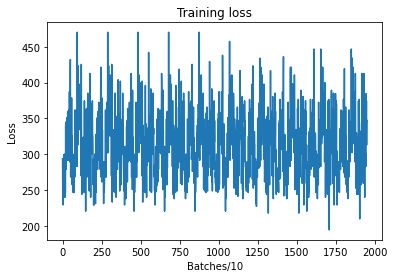

In [14]:
nb_steps_loss_sum = 10
loss = training(batch_size=1, nb_steps_loss_sum=nb_steps_loss_sum)

# Plotting the loss over training
plt.figure()
plt.plot(range(0, len(loss)), loss)
plt.xlabel(f"Batches/{nb_steps_loss_sum}")
plt.ylabel("Loss")
plt.title("Training loss")
plt.show()
plt.close()

In [15]:
def computeScore(X, y):
    correct = 0
    total = 0
    batch_size = 1
    with torch.no_grad():
        for idx in range(0, X.shape[0], batch_size):
            # TO COMPLETE:
            # - get the `batch_size` number of input samples
            #batch_size += 1
            total = total + batch_size
            # - compute the prediction of the neural network
            output = my_nn(X)
            # - get the max of the prediction (e.g. get the most likely class)
            # This can be done using `torch.max`.
            predicted = torch.max(output, 1)
            # - get the max of the target (e.g. correct class)
            target_pred = torch.max(y, 1)
            # - check if the prediction is correct and count it
            if predicted[1][idx] == target_pred[1][idx]:
                correct += 1
            # - count every sample
        
        batch_size += 1
            
    accuracy = correct/total * 100
    print(f"Accuracy of the network on the {total} samples: {accuracy:.2f}%")

In [16]:
computeScore(X_train, y_train)
computeScore(X_test, y_test)

Accuracy of the network on the 1949 samples: 0.00%
Accuracy of the network on the 4548 samples: 0.00%
